In [1]:
#import string
import re # Regex (expressão regular)
!pip install unidecode
from unicodedata import normalize # utíl para tratamento de texto e compatibilidade
!pip install nltk
import nltk # Ferramentas de PLN
!pip install sklearn
import sklearn # Ferramentas de aprendizado de máquina
!pip install pandas
import pandas as pd
!pip install seaborn
import seaborn as sns
!pip install matplotlib
import matplotlib.pyplot as plt # Plotagem de gráficos

print("\n" + '\033[1m' + '\033[93m' + "Importações feitas com sucesso!")


Importações feitas com sucesso!


## Dados
* As seguintes CSV foram baixados em [Portuguese Tweets for Sentiment Analysis](https://www.kaggle.com/augustop/portuguese-tweets-for-sentiment-analysis) criado por [augustop](https://www.kaggle.com/augustop) 

In [2]:
# https://www.kaggle.com/augustop/portuguese-tweets-for-sentiment-analysis
arquivos = [
    'TweetsNeutralNews.csv',
    'TweetsWithTheme.csv'
]

lista = list()

for arquivo in arquivos:
    df = pd.read_csv( "../dados/" + arquivo, sep=",", index_col=None, header=0)
    lista.append(df[['tweet_text','sentiment']])

tweets = pd.concat(lista, axis=0, ignore_index=True)

tweets['score'] = tweets['sentiment'].replace(['Negativo','Neutro', 'Positivo'], [-1, 0, 1])

tweets

,tweet_text,sentiment,score
0,Esquerda e direita empatam na Suécia; ultranac...,Neutro,0
1,Ao vivo: Estadão e TV Gazeta realizam terceiro...,Neutro,0
2,FOTOS: Apoiadores de Jair Bolsonaro realizam a...,Neutro,0
3,Barroso ameaça barrar propaganda se PT insisti...,Neutro,0
4,Serena Williams é multada pelo comportamento d...,Neutro,0
...,...,...,...
99142,As concorrentes estão prontas para tudo. :p Lo...,Positivo,1
99143,@Frases_RCampos @vrr93 Falei de um já pensando...,Positivo,1
99144,@njg00 @christophssj @pecesiqueira @cauemoura ...,Positivo,1
99145,que coisa mais triste uma amiga defendendo um ...,Negativo,-1


In [3]:
tweets['sentiment'].value_counts()

Neutro      37556
Positivo    32744
Negativo    28847
Name: sentiment, dtype: int64

In [4]:
# Deixando tudo em minúsculo
tweets['tweet_text'] = tweets['tweet_text'].str.lower()

tweets['tweet_text']

0        esquerda e direita empatam na suécia; ultranac...
1        ao vivo: estadão e tv gazeta realizam terceiro...
2        fotos: apoiadores de jair bolsonaro realizam a...
3        barroso ameaça barrar propaganda se pt insisti...
4        serena williams é multada pelo comportamento d...
                               ...                        
99142    as concorrentes estão prontas para tudo. :p lo...
99143    @frases_rcampos @vrr93 falei de um já pensando...
99144    @njg00 @christophssj @pecesiqueira @cauemoura ...
99145    que coisa mais triste uma amiga defendendo um ...
99146    @elevensports_pt @aneiscinco @putente @sitioco...
Name: tweet_text, Length: 99147, dtype: object

In [5]:
# Removendo tudo entre []
tweets['tweet_text'] = tweets['tweet_text'].replace(to_replace='\[.*?\]', value='', regex=True)

tweets['tweet_text']


0        esquerda e direita empatam na suécia; ultranac...
1        ao vivo: estadão e tv gazeta realizam terceiro...
2        fotos: apoiadores de jair bolsonaro realizam a...
3        barroso ameaça barrar propaganda se pt insisti...
4        serena williams é multada pelo comportamento d...
                               ...                        
99142    as concorrentes estão prontas para tudo. :p lo...
99143    @frases_rcampos @vrr93 falei de um já pensando...
99144    @njg00 @christophssj @pecesiqueira @cauemoura ...
99145    que coisa mais triste uma amiga defendendo um ...
99146    @elevensports_pt @aneiscinco @putente @sitioco...
Name: tweet_text, Length: 99147, dtype: object

In [6]:
# remover links
tweets['tweet_text'] = tweets['tweet_text'].replace(to_replace='https?://[A-Za-z0-9./]+', value='', regex=True)
tweets['tweet_text'] = tweets['tweet_text'].replace(to_replace='http?://[A-Za-z0-9./]+', value='', regex=True)
tweets['tweet_text'] = tweets['tweet_text'].replace(to_replace='wwww?://[A-Za-z0-9./]+', value='', regex=True)
tweets['tweet_text'] = tweets['tweet_text'].replace(to_replace='ftp?://[A-Za-z0-9./]+', value='', regex=True)

In [7]:
# remover emails

In [8]:
# Removendo números
tweets['tweet_text'] = tweets['tweet_text'].replace(to_replace='\d+', value='', regex=True)

tweets['tweet_text']

0        esquerda e direita empatam na suécia; ultranac...
1        ao vivo: estadão e tv gazeta realizam terceiro...
2        fotos: apoiadores de jair bolsonaro realizam a...
3        barroso ameaça barrar propaganda se pt insisti...
4        serena williams é multada pelo comportamento d...
                               ...                        
99142    as concorrentes estão prontas para tudo. :p lo...
99143    @frases_rcampos @vrr falei de um já pensando e...
99144    @njg @christophssj @pecesiqueira @cauemoura @r...
99145    que coisa mais triste uma amiga defendendo um ...
99146    @elevensports_pt @aneiscinco @putente @sitioco...
Name: tweet_text, Length: 99147, dtype: object

In [9]:
# Removendo #rashtags
tweets['tweet_text'] = tweets['tweet_text'].replace(to_replace=r'(\#\w+)', value='', regex=True)

tweets['tweet_text']

0        esquerda e direita empatam na suécia; ultranac...
1        ao vivo: estadão e tv gazeta realizam terceiro...
2        fotos: apoiadores de jair bolsonaro realizam a...
3        barroso ameaça barrar propaganda se pt insisti...
4        serena williams é multada pelo comportamento d...
                               ...                        
99142    as concorrentes estão prontas para tudo. :p lo...
99143    @frases_rcampos @vrr falei de um já pensando e...
99144    @njg @christophssj @pecesiqueira @cauemoura @r...
99145    que coisa mais triste uma amiga defendendo um ...
99146    @elevensports_pt @aneiscinco @putente @sitioco...
Name: tweet_text, Length: 99147, dtype: object

In [10]:
# Removendo @Mentions
tweets['tweet_text'] = tweets['tweet_text'].replace(to_replace=r'(\@\w+)', value='', regex=True)

tweets['tweet_text']

0        esquerda e direita empatam na suécia; ultranac...
1        ao vivo: estadão e tv gazeta realizam terceiro...
2        fotos: apoiadores de jair bolsonaro realizam a...
3        barroso ameaça barrar propaganda se pt insisti...
4        serena williams é multada pelo comportamento d...
                               ...                        
99142    as concorrentes estão prontas para tudo. :p lo...
99143      falei de um já pensando em conectar com o go...
99144         eu comecei isentao, pesquisei bastante, b...
99145    que coisa mais triste uma amiga defendendo um ...
99146             obrigado pela declaração de intenções :)
Name: tweet_text, Length: 99147, dtype: object

In [11]:
# Removendo a pontuação (EX: "!?.,/|#$%¨&")
tweets['tweet_text'] = tweets['tweet_text'].replace(to_replace=r'[^\w\s]', value='', regex=True)

tweets['tweet_text']

0        esquerda e direita empatam na suécia ultranaci...
1        ao vivo estadão e tv gazeta realizam terceiro ...
2        fotos apoiadores de jair bolsonaro realizam at...
3        barroso ameaça barrar propaganda se pt insisti...
4        serena williams é multada pelo comportamento d...
                               ...                        
99142    as concorrentes estão prontas para tudo p love...
99143      falei de um já pensando em conectar com o go...
99144         eu comecei isentao pesquisei bastante bai...
99145    que coisa mais triste uma amiga defendendo um ...
99146               obrigado pela declaração de intenções 
Name: tweet_text, Length: 99147, dtype: object

In [12]:
# Removendo acentuação
tweets['tweet_text'] = tweets['tweet_text'].str.normalize('NFKD').str.encode('ASCII', errors='ignore').str.decode('UTF-8')

tweets['tweet_text']

0        esquerda e direita empatam na suecia ultranaci...
1        ao vivo estadao e tv gazeta realizam terceiro ...
2        fotos apoiadores de jair bolsonaro realizam at...
3        barroso ameaca barrar propaganda se pt insisti...
4        serena williams e multada pelo comportamento d...
                               ...                        
99142    as concorrentes estao prontas para tudo p love...
99143      falei de um ja pensando em conectar com o go...
99144         eu comecei isentao pesquisei bastante bai...
99145    que coisa mais triste uma amiga defendendo um ...
99146               obrigado pela declaracao de intencoes 
Name: tweet_text, Length: 99147, dtype: object

In [13]:
# Uma stopword pode ser considerada uma palavra irrelevante para a análise
nltk.download('stopwords')
# RSLP(Removedor de Sufixos da Língua Portuguesa)
nltk.download('rslp')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\natan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\natan\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [14]:
# Criando uma lista de stopWords
stopWords = set(nltk.corpus.stopwords.words('portuguese'))
# O processo de stemming consiste em reduzir a palavra à sua raiz (sem levar em conta a classe gramatical)
stemmer = nltk.stem.RSLPStemmer() # RSLP(Removedor de Sufixos da Língua Portuguesa)
# Separa por tokens (tokens = palavras)
tokenizer = nltk.tokenize.WordPunctTokenizer()

In [15]:
todasPalavras = ' '.join([text for text in tweets['tweet_text']])

In [16]:
tokenizer = nltk.tokenize.WordPunctTokenizer()

In [17]:
tokensPalavras = tokenizer.tokenize(todasPalavras)

tokensPalavras

['esquerda',
 'e',
 'direita',
 'empatam',
 'na',
 'suecia',
 'ultranacionalistas',
 'avancam',
 'ao',
 'vivo',
 'estadao',
 'e',
 'tv',
 'gazeta',
 'realizam',
 'terceiro',
 'debate',
 'presidencial',
 'fotos',
 'apoiadores',
 'de',
 'jair',
 'bolsonaro',
 'realizam',
 'atos',
 'pelo',
 'pais',
 'barroso',
 'ameaca',
 'barrar',
 'propaganda',
 'se',
 'pt',
 'insistir',
 'em',
 'mostrar',
 'lula',
 'candidato',
 'serena',
 'williams',
 'e',
 'multada',
 'pelo',
 'comportamento',
 'durante',
 'final',
 'do',
 'us',
 'open',
 'apoiadores',
 'de',
 'jair',
 'bolsonaro',
 'realizam',
 'atos',
 'em',
 'tres',
 'cidades',
 'villas',
 'boas',
 'legitimidade',
 'de',
 'novo',
 'governo',
 'pode',
 'ate',
 'ser',
 'questionada',
 'policia',
 'australiana',
 'encontra',
 'cinco',
 'corpos',
 'em',
 'casa',
 'de',
 'perth',
 'megasena',
 'acumula',
 'e',
 'pagara',
 'r',
 'milhoes',
 'jair',
 'bolsonaro',
 'tem',
 'nitida',
 'melhora',
 'clinica',
 'diz',
 'novo',
 'boletim',
 'de',
 'hospital',


In [18]:
# Removendo StopWord do nosso texto
todasPalavrasFiltradas = [palavra for palavra in tokensPalavras if palavra not in stopWords and len(palavra) > 4]

In [19]:
frequenciaPalavras = nltk.FreqDist(todasPalavrasFiltradas)

In [20]:
df_frequencia_palavras = pd.DataFrame({
    'palavra': list(frequenciaPalavras.keys()),
    'frequencia': list(frequenciaPalavras.values())
})


In [21]:
maisFrequentes = df_frequencia_palavras.nlargest(columns='frequencia', n=10)

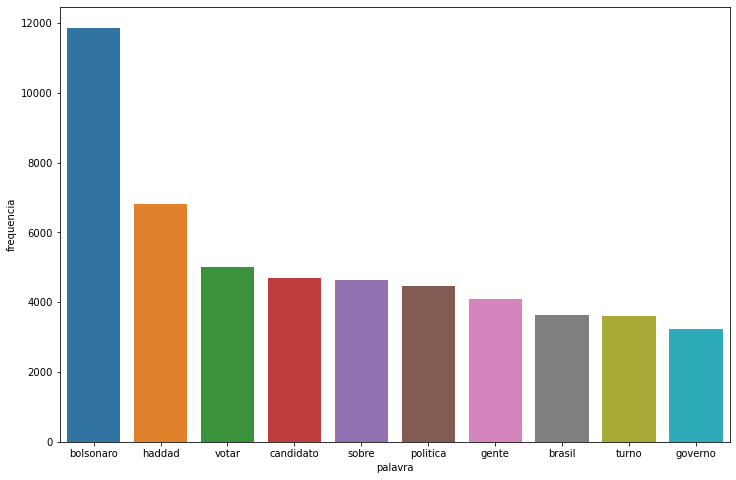

In [22]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=maisFrequentes, x='palavra', y='frequencia')
ax.set(ylabel='frequencia')
plt.show()

In [23]:
# Nesse passo é criado uma função que faz a Tokenização e o Stemming
def criarBagOfWords(text, stop_words=stopWords):
    tokens = tokenizer.tokenize(text)
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(tokens)

tweets['bag_of_words'] = tweets['tweet_text'].apply(criarBagOfWords)
#tweets['bag_of_words_stemmed'] = tweets['tweet_text'].apply(criarBagOfWords)

In [24]:
# Bag-of-words: Conjunto não-ordenado de palavras e sua multiplicidade
# Cria um "Bag of Words (Saco de Palavras)" do nosso texto e ignora números

In [25]:
tweets.head()

,tweet_text,sentiment,score,bag_of_words
0,esquerda e direita empatam na suecia ultranaci...,Neutro,0,esquerd direit empat suec ultranacion avanc
1,ao vivo estadao e tv gazeta realizam terceiro ...,Neutro,0,viv estada tv gazet realiz terc debat presid
2,fotos apoiadores de jair bolsonaro realizam at...,Neutro,0,fot apoi jair bolsonar realiz ato pal
3,barroso ameaca barrar propaganda se pt insisti...,Neutro,0,barr ameac barr propagand pt insist mostr lul ...
4,serena williams e multada pelo comportamento d...,Neutro,0,seren will mult comport dur final us open


In [26]:
todasPalavras = ' '.join([text for text in tweets['bag_of_words']])
tokensPalavras = tokenizer.tokenize(todasPalavras)

In [27]:
tokensPalavras

['esquerd',
 'direit',
 'empat',
 'suec',
 'ultranacion',
 'avanc',
 'viv',
 'estada',
 'tv',
 'gazet',
 'realiz',
 'terc',
 'debat',
 'presid',
 'fot',
 'apoi',
 'jair',
 'bolsonar',
 'realiz',
 'ato',
 'pal',
 'barr',
 'ameac',
 'barr',
 'propagand',
 'pt',
 'insist',
 'mostr',
 'lul',
 'candidat',
 'seren',
 'will',
 'mult',
 'comport',
 'dur',
 'final',
 'us',
 'open',
 'apoi',
 'jair',
 'bolsonar',
 'realiz',
 'ato',
 'tre',
 'cidad',
 'vill',
 'boa',
 'legitim',
 'nov',
 'govern',
 'pod',
 'ate',
 'ser',
 'question',
 'polic',
 'australi',
 'encontr',
 'cinc',
 'corp',
 'cas',
 'perth',
 'megasen',
 'acumul',
 'pag',
 'r',
 'milho',
 'jair',
 'bolsonar',
 'nit',
 'melhor',
 'clin',
 'diz',
 'nov',
 'boletim',
 'hospit',
 'suec',
 'vai',
 'urn',
 'mei',
 'avanc',
 'extremadireit',
 'defês',
 'lul',
 'ped',
 'ros',
 'web',
 'temp',
 'substitu',
 'candidat',
 'brasileira',
 'flameng',
 'despach',
 'chapeco',
 'sob',
 'tabel',
 'bolsonar',
 'pass',
 'mei',
 'hor',
 'sent',
 'and',
 '

In [28]:
frequenciaPalavras = nltk.FreqDist(todasPalavrasFiltradas)

In [29]:
df_frequencia_palavras = pd.DataFrame({
    'palavra': list(frequenciaPalavras.keys()),
    'frequencia': list(frequenciaPalavras.values())
})

In [30]:
maisFrequentes = df_frequencia_palavras.nlargest(columns='frequencia', n=10)

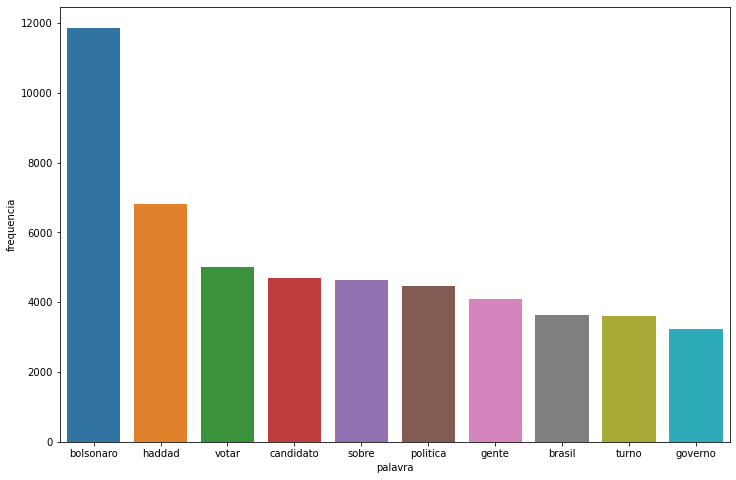

In [31]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=maisFrequentes, x='palavra', y='frequencia')
ax.set(ylabel='frequencia')
plt.show()

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(lowercase=False, max_features=500, ngram_range=(1,2))

vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=False, max_df=1.0, max_features=500,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [33]:
bag_of_words = vectorizer.fit_transform(tweets['tweet_text'])

bag_of_words

<99147x500 sparse matrix of type '<class 'numpy.float64'>'
	with 915623 stored elements in Compressed Sparse Row format>

In [34]:
from sklearn.model_selection import train_test_split
X = bag_of_words
y = tweets['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [35]:
from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier()
dummy_classifier.fit(X_train, y_train)
dummy_classifier.score(X_test, y_test)

0.33535047907211296

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7892586989409985

In [37]:
weights = pd.DataFrame(
    model.coef_[0].T,
    index=vectorizer.get_feature_names()
)

weights

,0
acha,-0.042557
achei,1.516687
acho,1.675915
acho que,1.252358
acredito,1.375156
...,...
votar em,-0.495397
votar no,0.448704
voto,-0.486034
votos,0.588282


In [38]:
weights.nlargest(10, 0).T

,triste,infelizmente,queria,poxa,ta,eu,gente,bolsominion,ciro,to
0,6.510649,5.169561,4.381498,3.680221,3.429278,3.246902,2.933856,2.702597,2.666987,2.625794


In [39]:
weights.nsmallest(10, 0).T

,diz,veja,para,de,eua,dolar,sobre,mostra,pede,ao
0,-4.81332,-2.463704,-2.231646,-1.712813,-1.543152,-1.533182,-1.499214,-1.403916,-1.399724,-1.348973


In [40]:
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score

In [41]:
tweets

,tweet_text,sentiment,score,bag_of_words
0,esquerda e direita empatam na suecia ultranaci...,Neutro,0,esquerd direit empat suec ultranacion avanc
1,ao vivo estadao e tv gazeta realizam terceiro ...,Neutro,0,viv estada tv gazet realiz terc debat presid
2,fotos apoiadores de jair bolsonaro realizam at...,Neutro,0,fot apoi jair bolsonar realiz ato pal
3,barroso ameaca barrar propaganda se pt insisti...,Neutro,0,barr ameac barr propagand pt insist mostr lul ...
4,serena williams e multada pelo comportamento d...,Neutro,0,seren will mult comport dur final us open
...,...,...,...,...
99142,as concorrentes estao prontas para tudo p love...,Positivo,1,concorr esta pront tud p lov on top
99143,falei de um ja pensando em conectar com o go...,Positivo,1,fal ja pens conect govern outr acab embol nom ...
99144,eu comecei isentao pesquisei bastante bai...,Positivo,1,comec isenta pesquis bast baix mont app notic ...
99145,que coisa mais triste uma amiga defendendo um ...,Negativo,-1,cois trist amig defend bocal fasc merd


In [42]:
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii', stop_words=stopWords)

In [43]:
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words={'a', 'ao', 'aos', 'aquela', 'aquelas', 'aquele',
                            'aqueles', 'aquilo', 'as', 'até', 'com', 'como',
                            'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles',
                            'depois', 'do', 'dos', 'e', 'ela', 'elas', 'ele',
                            'eles', 'em', 'entre', 'era', ...},
                strip_accents='ascii', sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [44]:
y = tweets['score']

In [45]:
X = vectorizer.fit_transform(tweets['tweet_text'])

In [46]:
print(y.shape)
print(X.shape)

(99147,)
(99147, 56173)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [48]:
clf = naive_bayes.MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)